<a href="https://colab.research.google.com/github/scaairesearch/da_cv_fer/blob/main/da_cv_fer_sfew_expw_v12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning repository
Importing files regarding dataset, model, mains and utils

In [1]:
!git clone https://github.com/scaairesearch/da_cv_fer
import os
os.getcwd()
os.chdir('da_cv_fer')

Cloning into 'da_cv_fer'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 233 (delta 9), reused 0 (delta 0), pack-reused 209
Receiving objects: 100% (233/233), 10.75 MiB | 14.82 MiB/s, done.
Resolving deltas: 100% (123/123), done.


Installing dependencies

In [2]:
!pip install -q -r requirements.txt # -q is for quiet install
# for some reason the below does not get installed with requirements
!pip install -q opendatasets
!pip install -q facenet_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

## Libraries and Initializations

In [3]:
# Installs from files
from da_cv_fer.data_config import DataConfig
from da_cv_fer.ds_sfew import DatasetSFEW
from da_cv_fer.ds_sfew_crop import DatasetSFEWCROP
from da_cv_fer.ds_expw_crop import EXPWCROP
from da_cv_fer.ds_expw import EXPW
from da_cv_fer.utils import *
from da_cv_fer.model_DANN import DANN
from da_cv_fer.run_config import RunConfig
from da_cv_fer.train import *
import os
import zipfile

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

from tqdm import tqdm # for beautiful model training updates

import matplotlib.pyplot as plt # for plots

import time
from pathlib import Path

from copy import deepcopy
import numpy as np


### Initializing configs

In [4]:
#initializing dataconfig, it tells us about dataset configuration and directory structure
dataconfig = DataConfig()

## SFEW Dataset

Creating dataloader objects.

It copies files from a google drive, unzips it and sets that for use

details: da_cv_fer.ds_sfew.DatasetSFEW

In [5]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# sfew = DatasetSFEW()
sfew = DatasetSFEWCROP()
sfew_train_loader, sfew_val_loader = sfew.get_dataloader()
print(f' length of SFEW dataset : {len(sfew_train_loader.dataset)}')

 self.BASE_PATH -dataset, 
 self.EXTRACT_DIR-dataset/sfew,
 self.ZIP_FILE_PATH - dataset/SFEW_2.zip 
Directory dataset/sfew created successfully.
No files (including zip file) found in dataset/sfew.Copying file
Starting File copying from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
File copied successfully from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
Initiating extraction of dataset/sfew/SFEW_2.zip to dataset/sfew
...completed for dataset/sfew/SFEW_2.zip
dataset/sfew/Train Happy.zip Happy
...completed for dataset/sfew/Train/Happy.zip
dataset/sfew/Train Sad.zip Sad
...completed for dataset/sfew/Train/Sad.zip
dataset/sfew/Train Fear.zip Fear
...completed for dataset/sfew/Train/Fear.zip
dataset/sfew/Train Surprise.zip Surprise
...completed for dataset/sfew/Train/Surprise.zip
dataset/sfew/Train Neutral.zip Neutral
...completed for dataset/sfew/Train/Neutral.zip
dataset/sfew/Train Disgust.zip Disgust
...completed for dataset/sfew/Train/Disgust.

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


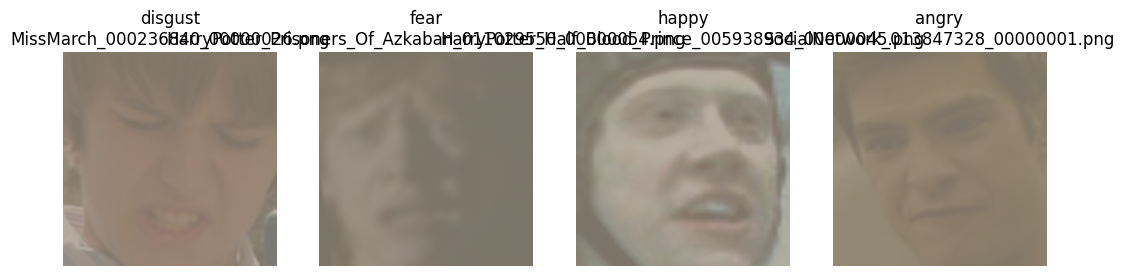

In [7]:
show_batch(sfew_train_loader,sfew.labels,4)

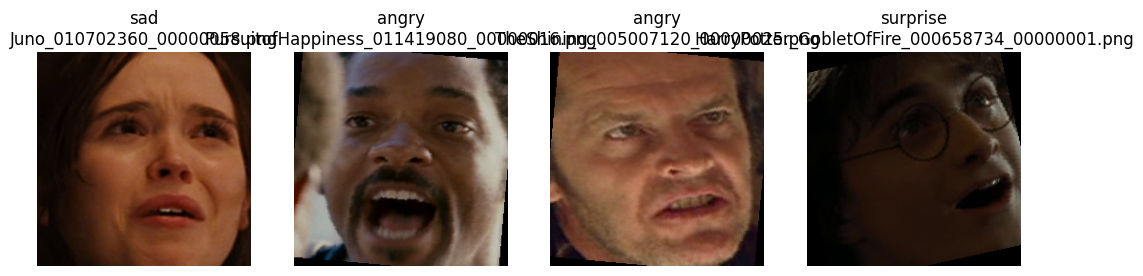

In [8]:
show_batch(sfew_train_loader,sfew.labels,4, normalized = False)

## EXPW Dataset
Creating dataset and dataloader objects.
Split into train and val.

`details: da_cv_fer.ds_expw.EXPW`
<br>
Please be patient, it takes around 3 minutes to download data set

In [9]:
# expw_obj = EXPW()
expw_obj = EXPWCROP()

expw_train_ds, expw_val_ds = expw_obj.get_dataset()
expw_train_loader, expw_val_loader = expw_obj.get_dataloader()
print(f' length of EXPW dataset : {len(expw_train_loader.dataset)} , {len(expw_train_ds)}')

desitination file path = dataset/expwds/expwds.zip
in EXPW()...
Directory dataset/expwds created successfully.


100%|██████████| 7.68G/7.68G [06:24<00:00, 21.4MB/s]



File downloaded successfully from https://www.kaggle.com/datasets/mohammedaaltaha/expwds to dataset/expwds/expwds.zip
Unzipped Files already exist in dataset/expwds, not extracted
Directory created: dataset/expwds/cropped
**** dataset/expwds/cropped is empty***

 
633 cropped images created in cropped
 length of EXPW dataset : 646 , 646


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


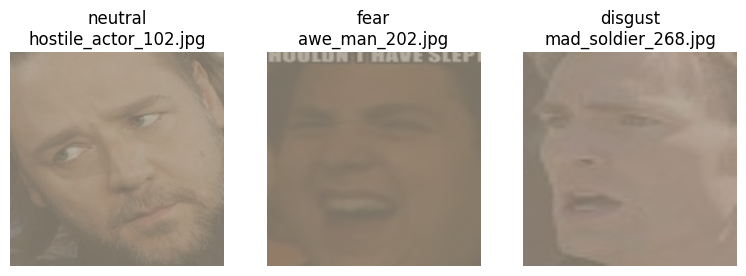

In [10]:
show_batch(expw_train_loader,expw_train_ds.labels,3)

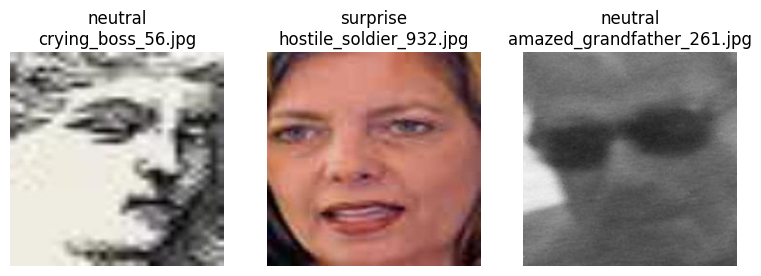

In [11]:
show_batch(expw_train_loader,expw_train_ds.labels,3, normalized = False)

## Creating Dataloaders for source and target

In [12]:
sfew_loader = {'name': 'sfew',
               'train':sfew_train_loader,
               'val':sfew_val_loader
               }
data_loader = {'source' : sfew_loader}
source_name = data_loader['source']['name']


In [13]:
sfew_loader = {'name': 'sfew',
               'train':sfew_train_loader,
               'val':sfew_val_loader
               }

expw_loader = {'name': 'expw',
               'train':expw_train_loader,
               'val':expw_val_loader
               }

data_loader = {'source' : sfew_loader,
               'target' : expw_loader}

source_name = data_loader['source']['name']
target_name = data_loader['target']['name']

## Initializing Model
details are present in `model_DANN`

In [14]:
model = DANN(num_classes=7,backbone='resnet18', dropout=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 114MB/s]


feature extractor backbone created using resnet18 model


In [15]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.to(device)

cuda


Running model for single run. checking output shapes

In [16]:
for usage, dict_data_loader in data_loader.items(): ## {'source' : sfew_loader,'target' : expw_loader}
    print('-'*80)
    print(usage)
    for k, v in dict_data_loader.items(): # {'name': 'sfew','train':sfew_train_loader,'val':sfew_val_loader}
      if k == 'name':
        print (f'--------{k} of dataset : {v}--------')
      else:
        print (f'   --------type : {k}--------')
        batch = next(iter(v)) # it may be possible that some datasets have more than 2 outputs, so this strategy is safe
        images, labels = batch[0].to(device), batch[1].to(device)
        print( "Input:\n","Input Image: ",images.shape, ", labels: ",labels.shape)

        x_labels, x_domains, x_features = model(images) # forward pass
        print("Output:\n", "labels: ", x_labels.shape, ", domains: ",x_domains.shape, ", features: ", x_features.shape)


--------------------------------------------------------------------------------
source
--------name of dataset : sfew--------
   --------type : train--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , labels:  torch.Size([16, 7])
Output:
 labels:  torch.Size([16, 7]) , domains:  torch.Size([16, 2]) , features:  torch.Size([16, 1000])
   --------type : val--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , labels:  torch.Size([16, 7])
Output:
 labels:  torch.Size([16, 7]) , domains:  torch.Size([16, 2]) , features:  torch.Size([16, 1000])
--------------------------------------------------------------------------------
target
--------name of dataset : expw--------
   --------type : train--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , labels:  torch.Size([16, 7])
Output:
 labels:  torch.Size([16, 7]) , domains:  torch.Size([16, 2]) , features:  torch.Size([16, 1000])
   --------type : val--------
Input:
 Input Image:  torch.Size([16, 3, 224, 224]) , l

In [17]:
# #@title Weight Initialization

# # initializating weights using xavier normal
# def weights_init(m):
#     if isinstance(m, nn.Conv2d):
#       nn.init.xavier_normal_(m.weight)
#     elif isinstance(m, nn.Linear):
#       nn.init.xavier_normal_(m.weight)
#       nn.init.zeros_(m.bias)

# # initializating weights using xavier normal
# def weights_init(m):
#     if isinstance(m, nn.Conv2d):
#       # nn.init.xavier_normal_(m.weight)
#       pass # not initialising Conv layers as they are pretrained
#     elif isinstance(m, nn.Linear):
#       nn.init.xavier_normal_(m.weight) # Linear layers are added on
#       nn.init.zeros_(m.bias)

## Non DANN: Training, Validating, Saving

### Early Stopping Scheduler - ReduceLRonPlateau

In [18]:
# def early_stopping_difference(list_loss: list, patience = 5, difference = 0.0003):
#   if len(list_loss) > patience:
#     reverse_list_loss = list_loss[::-1]
#     reverse_list_loss = reverse_list_loss[0:patience+1]
#     for index in range(0,len(reverse_list_loss)-1):
#       if abs(reverse_list_loss[index] - reverse_list_loss[index+1]) > difference:
#         return False
#     return True
#   else:
#     return False

Configuration towards execution

In [19]:
runconfig = RunConfig()
device = runconfig.device

non_dann_model = DANN(num_classes=7, backbone = 'resnet18')
non_dann_model = non_dann_model.to(device)
best_non_dann_model = DANN(num_classes=7, backbone = 'resnet18').to(device)
# non_dann_model.apply(weights_init) # initializing model, only linear layers

#learning rate
lr = float(runconfig.inital_lr)

# Epochs
EPOCHS = runconfig.NUM_EPOCHS
# EPOCHS = 5 #override
print("EPOCHS", EPOCHS)

# ReduceLRonPlateau Scheduler Params
scheduler_patience = runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = runconfig.early_stop_patience
early_stop_difference = runconfig.early_stop_difference

# optimizer
optimizer = optim.SGD(non_dann_model.parameters(), lr = lr, momentum = 0.9)

# Set up the ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              min_lr=1e-6,
                              verbose= True)

# Initialize variables to track the best validation loss and the best model state
best_val_loss = float('inf')
best_val_acc = 0
best_model_state = None

# loss functions
criterion_class = (runconfig.criterion_class).to(device=device)
criterion_domain = (runconfig.criterion_domain).to(device=device)

# loss accumulation
train_losses = [] # to capture train losses over training epochs
val_losses = [] # to capture validation loss over epochs
lr_schedule = [] # to capture learning rate over epochs
epoch_converge = 0 #TODO: run config based

feature extractor backbone created using resnet18 model
feature extractor backbone created using resnet18 model
EPOCHS 50


In [20]:
# Training block
print('------ Training started for Non DANN Model ---- ')
print(f'starting LR : {lr}')
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, " of ", EPOCHS)

    #Train Model
    avg_epoch_loss, curr_lr = train_model(model = non_dann_model,
                                          device = device,
                                          data_loader = data_loader['source']['train'],
                                          optimizer = optimizer,
                                          epoch = epoch,
                                          class_loss_function = criterion_class)
    train_losses.append(avg_epoch_loss)
    lr_schedule.append(curr_lr)

    #Adding Scheduler #TODO: ADD SCHEDULER
    scheduler.step(avg_epoch_loss) #applying scheduler on training loss

    #Validate Model
    correct, avg_epoch_val_loss = test_model(model= non_dann_model,
                                    device= device,
                                    data_loader = data_loader['source']['val'],
                                    class_loss_function = criterion_class
                                    )

    val_losses.append(avg_epoch_val_loss)
    # # Check if the current model has the best validation loss
    # print(f'Last Epoch Val Loss = {avg_epoch_val_loss} | Best Val Loss = {best_val_loss}' )
    # if avg_epoch_val_loss < best_val_loss:
    #   best_val_loss = avg_epoch_val_loss
    #   # save the current model state as the best model state
    #   best_model_state = deepcopy(non_dann_model.state_dict())
    #   print(f'Updated the best model with validation loss: {best_val_loss}\n')

    # check if the current model has the best accuracy
    print (f'last correct ={correct} | best correct = {best_val_acc}')
    if correct > best_val_acc:
      best_val_acc = correct
      # save the current model state as the best model state
      best_model_state = deepcopy(non_dann_model.state_dict())
      print(f'Updated the best model with correct: {correct}\n')


    if early_stopping_difference(val_losses,
                                 patience = early_stop_patience,
                                 difference= early_stop_difference):
      print (f'-------Early Stopping at epoch {epoch+1}---')
      epoch_converge = epoch+1
      break

## using params of best model to update model
if best_model_state: # only update if best model has been saved, else the last one would be picked up
  # best_non_dann_model.load_state_dict(best_model_state)
  non_dann_model.load_state_dict(best_model_state)
  print('Best model loaded')


print(f'Validation results with {source_name}')

correct, test_loss_source = test_model(model= non_dann_model, #best_non_dann_model, #non_dann_model,
                                    device= device,
                                    data_loader = data_loader['source']['val'], # source val loader
                                    class_loss_function = criterion_class)

print(f'Test results with {target_name}')
correct, test_loss_target = test_model(model= non_dann_model, #best_non_dann_model, #non_dann_model,
                                    device= device,
                                    data_loader = data_loader['target']['val'], # target val loader
                                    class_loss_function = criterion_class)

dict_non_dann_losses = {'train_losses' : train_losses,
                                       'val_losses': val_losses,
                                       'test_loss_source' : test_loss_source,
                                       'test_loss_target' : test_loss_target,
                                       'epoch_convergence' : epoch_converge,
                                       'lr': lr_schedule}




------ Training started for Non DANN Model ---- 
starting LR : 0.005
EPOCH: 1  of  50
epoch = 1...in training function


Loss=1.9607430696487427 Accuracy=228/913(24.97%) Epoch Avg loss=0.12044012 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  7.09it/s]


Test / Val: Average loss: 0.1252, Accuracy: 67/419 (15.99%)

last correct =67 | best correct = 0
Updated the best model with correct: 67

EPOCH: 2  of  50
epoch = 2...in training function


Loss=1.7292392253875732 Accuracy=307/913(33.63%) Epoch Avg loss=0.11029747 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.90it/s]


Test / Val: Average loss: 0.1270, Accuracy: 107/419 (25.54%)

last correct =107 | best correct = 67
Updated the best model with correct: 107

EPOCH: 3  of  50
epoch = 3...in training function


Loss=1.7847347259521484 Accuracy=419/913(45.89%) Epoch Avg loss=0.09634574 LR=0.005000: 100%|██████████| 58/58 [00:07<00:00,  8.04it/s]


Test / Val: Average loss: 0.1266, Accuracy: 106/419 (25.30%)

last correct =106 | best correct = 107
EPOCH: 4  of  50
epoch = 4...in training function


Loss=1.5297144651412964 Accuracy=421/913(46.11%) Epoch Avg loss=0.09206530 LR=0.005000: 100%|██████████| 58/58 [00:06<00:00,  8.77it/s]


Test / Val: Average loss: 0.1083, Accuracy: 165/419 (39.38%)

last correct =165 | best correct = 107
Updated the best model with correct: 165

EPOCH: 5  of  50
epoch = 5...in training function


Loss=2.3269147872924805 Accuracy=486/913(53.23%) Epoch Avg loss=0.08065749 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.86it/s]


Test / Val: Average loss: 0.1190, Accuracy: 134/419 (31.98%)

last correct =134 | best correct = 165
EPOCH: 6  of  50
epoch = 6...in training function


Loss=2.3094639778137207 Accuracy=591/913(64.73%) Epoch Avg loss=0.06983899 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.87it/s]


Test / Val: Average loss: 0.1313, Accuracy: 157/419 (37.47%)

last correct =157 | best correct = 165
EPOCH: 7  of  50
epoch = 7...in training function


Loss=1.2461191415786743 Accuracy=597/913(65.39%) Epoch Avg loss=0.06487202 LR=0.005000: 100%|██████████| 58/58 [00:06<00:00,  8.61it/s]


Test / Val: Average loss: 0.1117, Accuracy: 155/419 (36.99%)

last correct =155 | best correct = 165
EPOCH: 8  of  50
epoch = 8...in training function


Loss=2.219754457473755 Accuracy=598/913(65.50%) Epoch Avg loss=0.06586886 LR=0.005000: 100%|██████████| 58/58 [00:06<00:00,  8.76it/s]


Test / Val: Average loss: 0.1259, Accuracy: 149/419 (35.56%)

last correct =149 | best correct = 165
EPOCH: 9  of  50
epoch = 9...in training function


Loss=1.4852056503295898 Accuracy=641/913(70.21%) Epoch Avg loss=0.05755200 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.81it/s]


Test / Val: Average loss: 0.1419, Accuracy: 169/419 (40.33%)

last correct =169 | best correct = 165
Updated the best model with correct: 169

EPOCH: 10  of  50
epoch = 10...in training function


Loss=2.343980312347412 Accuracy=654/913(71.63%) Epoch Avg loss=0.05547404 LR=0.005000: 100%|██████████| 58/58 [00:07<00:00,  7.35it/s]


Test / Val: Average loss: 0.1366, Accuracy: 176/419 (42.00%)

last correct =176 | best correct = 169
Updated the best model with correct: 176

EPOCH: 11  of  50
epoch = 11...in training function


Loss=1.8730401992797852 Accuracy=681/913(74.59%) Epoch Avg loss=0.05120866 LR=0.005000: 100%|██████████| 58/58 [00:06<00:00,  8.56it/s]


Test / Val: Average loss: 0.1223, Accuracy: 176/419 (42.00%)

last correct =176 | best correct = 176
EPOCH: 12  of  50
epoch = 12...in training function


Loss=1.6361184120178223 Accuracy=700/913(76.67%) Epoch Avg loss=0.04591940 LR=0.005000: 100%|██████████| 58/58 [00:07<00:00,  7.58it/s]


Test / Val: Average loss: 0.1492, Accuracy: 148/419 (35.32%)

last correct =148 | best correct = 176
EPOCH: 13  of  50
epoch = 13...in training function


Loss=2.3803818225860596 Accuracy=727/913(79.63%) Epoch Avg loss=0.04074421 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.98it/s]


Test / Val: Average loss: 0.1348, Accuracy: 175/419 (41.77%)

last correct =175 | best correct = 176
EPOCH: 14  of  50
epoch = 14...in training function


Loss=2.3015780448913574 Accuracy=735/913(80.50%) Epoch Avg loss=0.03672716 LR=0.005000: 100%|██████████| 58/58 [00:07<00:00,  8.16it/s]


Test / Val: Average loss: 0.1359, Accuracy: 182/419 (43.44%)

last correct =182 | best correct = 176
Updated the best model with correct: 182

EPOCH: 15  of  50
epoch = 15...in training function


Loss=1.6614551544189453 Accuracy=731/913(80.07%) Epoch Avg loss=0.03748463 LR=0.005000: 100%|██████████| 58/58 [00:06<00:00,  8.59it/s]


Test / Val: Average loss: 0.1167, Accuracy: 186/419 (44.39%)

last correct =186 | best correct = 182
Updated the best model with correct: 186

EPOCH: 16  of  50
epoch = 16...in training function


Loss=2.0359933376312256 Accuracy=767/913(84.01%) Epoch Avg loss=0.03220961 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.79it/s]


Test / Val: Average loss: 0.1568, Accuracy: 164/419 (39.14%)

last correct =164 | best correct = 186
EPOCH: 17  of  50
epoch = 17...in training function


Loss=2.6044299602508545 Accuracy=781/913(85.54%) Epoch Avg loss=0.03144321 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  7.07it/s]


Test / Val: Average loss: 0.1652, Accuracy: 184/419 (43.91%)

last correct =184 | best correct = 186
EPOCH: 18  of  50
epoch = 18...in training function


Loss=1.7557706832885742 Accuracy=777/913(85.10%) Epoch Avg loss=0.02933700 LR=0.005000: 100%|██████████| 58/58 [00:06<00:00,  8.66it/s]


Test / Val: Average loss: 0.1494, Accuracy: 164/419 (39.14%)

last correct =164 | best correct = 186
EPOCH: 19  of  50
epoch = 19...in training function


Loss=2.212965488433838 Accuracy=790/913(86.53%) Epoch Avg loss=0.02865474 LR=0.005000: 100%|██████████| 58/58 [00:07<00:00,  7.65it/s]


Test / Val: Average loss: 0.1645, Accuracy: 176/419 (42.00%)

last correct =176 | best correct = 186
EPOCH: 20  of  50
epoch = 20...in training function


Loss=1.6968276500701904 Accuracy=807/913(88.39%) Epoch Avg loss=0.02666669 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.85it/s]


Test / Val: Average loss: 0.1489, Accuracy: 166/419 (39.62%)

last correct =166 | best correct = 186
EPOCH: 21  of  50
epoch = 21...in training function


Loss=1.9977869987487793 Accuracy=796/913(87.19%) Epoch Avg loss=0.02665794 LR=0.005000: 100%|██████████| 58/58 [00:06<00:00,  8.51it/s]


Test / Val: Average loss: 0.1573, Accuracy: 186/419 (44.39%)

last correct =186 | best correct = 186
EPOCH: 22  of  50
epoch = 22...in training function


Loss=2.0152807235717773 Accuracy=810/913(88.72%) Epoch Avg loss=0.02501471 LR=0.005000: 100%|██████████| 58/58 [00:06<00:00,  8.69it/s]


Test / Val: Average loss: 0.1784, Accuracy: 147/419 (35.08%)

last correct =147 | best correct = 186
EPOCH: 23  of  50
epoch = 23...in training function


Loss=1.8935701847076416 Accuracy=800/913(87.62%) Epoch Avg loss=0.02456194 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.92it/s]


Test / Val: Average loss: 0.1478, Accuracy: 180/419 (42.96%)

last correct =180 | best correct = 186
EPOCH: 24  of  50
epoch = 24...in training function


Loss=2.493497848510742 Accuracy=828/913(90.69%) Epoch Avg loss=0.02158361 LR=0.005000: 100%|██████████| 58/58 [00:07<00:00,  7.38it/s]


Test / Val: Average loss: 0.1536, Accuracy: 188/419 (44.87%)

last correct =188 | best correct = 186
Updated the best model with correct: 188

EPOCH: 25  of  50
epoch = 25...in training function


Loss=1.8058290481567383 Accuracy=824/913(90.25%) Epoch Avg loss=0.01952840 LR=0.005000: 100%|██████████| 58/58 [00:06<00:00,  8.65it/s]


Test / Val: Average loss: 0.1969, Accuracy: 137/419 (32.70%)

last correct =137 | best correct = 188
EPOCH: 26  of  50
epoch = 26...in training function


Loss=2.1495885848999023 Accuracy=820/913(89.81%) Epoch Avg loss=0.02220284 LR=0.005000: 100%|██████████| 58/58 [00:07<00:00,  7.39it/s]


Test / Val: Average loss: 0.1742, Accuracy: 188/419 (44.87%)

last correct =188 | best correct = 188
EPOCH: 27  of  50
epoch = 27...in training function


Loss=1.1420507431030273 Accuracy=825/913(90.36%) Epoch Avg loss=0.01965014 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.98it/s]


Test / Val: Average loss: 0.1631, Accuracy: 177/419 (42.24%)

last correct =177 | best correct = 188
EPOCH: 28  of  50
epoch = 28...in training function


Loss=0.8920979499816895 Accuracy=851/913(93.21%) Epoch Avg loss=0.01698086 LR=0.005000: 100%|██████████| 58/58 [00:06<00:00,  8.62it/s]


Test / Val: Average loss: 0.1760, Accuracy: 185/419 (44.15%)

last correct =185 | best correct = 188
EPOCH: 29  of  50
epoch = 29...in training function


Loss=2.517437696456909 Accuracy=851/913(93.21%) Epoch Avg loss=0.01671500 LR=0.005000: 100%|██████████| 58/58 [00:06<00:00,  8.67it/s]


Test / Val: Average loss: 0.1521, Accuracy: 181/419 (43.20%)

last correct =181 | best correct = 188
EPOCH: 30  of  50
epoch = 30...in training function


Loss=2.7963147163391113 Accuracy=833/913(91.24%) Epoch Avg loss=0.01985786 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.90it/s]


Test / Val: Average loss: 0.1442, Accuracy: 191/419 (45.58%)

last correct =191 | best correct = 188
Updated the best model with correct: 191

EPOCH: 31  of  50
epoch = 31...in training function


Loss=1.9011904001235962 Accuracy=849/913(92.99%) Epoch Avg loss=0.01589672 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  7.24it/s]


Test / Val: Average loss: 0.1534, Accuracy: 170/419 (40.57%)

last correct =170 | best correct = 191
EPOCH: 32  of  50
epoch = 32...in training function


Loss=2.6068782806396484 Accuracy=857/913(93.87%) Epoch Avg loss=0.01461940 LR=0.005000: 100%|██████████| 58/58 [00:06<00:00,  8.71it/s]


Test / Val: Average loss: 0.1732, Accuracy: 178/419 (42.48%)

last correct =178 | best correct = 191
EPOCH: 33  of  50
epoch = 33...in training function


Loss=2.0817365646362305 Accuracy=848/913(92.88%) Epoch Avg loss=0.01544278 LR=0.005000: 100%|██████████| 58/58 [00:07<00:00,  7.57it/s]


Test / Val: Average loss: 0.1969, Accuracy: 177/419 (42.24%)

last correct =177 | best correct = 191
EPOCH: 34  of  50
epoch = 34...in training function


Loss=1.922660231590271 Accuracy=860/913(94.19%) Epoch Avg loss=0.01233957 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.86it/s]


Test / Val: Average loss: 0.1847, Accuracy: 177/419 (42.24%)

last correct =177 | best correct = 191
EPOCH: 35  of  50
epoch = 35...in training function


Loss=1.855970859527588 Accuracy=840/913(92.00%) Epoch Avg loss=0.01724131 LR=0.005000: 100%|██████████| 58/58 [00:07<00:00,  8.23it/s]


Test / Val: Average loss: 0.2002, Accuracy: 154/419 (36.75%)

last correct =154 | best correct = 191
EPOCH: 36  of  50
epoch = 36...in training function


Loss=1.9927055835723877 Accuracy=838/913(91.79%) Epoch Avg loss=0.01826341 LR=0.005000: 100%|██████████| 58/58 [00:06<00:00,  8.83it/s]


Test / Val: Average loss: 0.1736, Accuracy: 165/419 (39.38%)

last correct =165 | best correct = 191
EPOCH: 37  of  50
epoch = 37...in training function


Loss=2.5967931747436523 Accuracy=872/913(95.51%) Epoch Avg loss=0.01244643 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  6.81it/s]


Test / Val: Average loss: 0.1906, Accuracy: 187/419 (44.63%)

last correct =187 | best correct = 191
EPOCH: 38  of  50
epoch = 38...in training function


Loss=1.8804197311401367 Accuracy=863/913(94.52%) Epoch Avg loss=0.01250729 LR=0.005000: 100%|██████████| 58/58 [00:08<00:00,  7.23it/s]

Epoch 00038: reducing learning rate of group 0 to 1.0000e-03.


Test / Val: Average loss: 0.1761, Accuracy: 183/419 (43.68%)

last correct =183 | best correct = 191
EPOCH: 39  of  50
epoch = 39...in training function


Loss=1.8764045238494873 Accuracy=876/913(95.95%) Epoch Avg loss=0.00962118 LR=0.001000: 100%|██████████| 58/58 [00:06<00:00,  8.72it/s]


Test / Val: Average loss: 0.1758, Accuracy: 192/419 (45.82%)

last correct =192 | best correct = 191
Updated the best model with correct: 192

EPOCH: 40  of  50
epoch = 40...in training function


Loss=1.732724666595459 Accuracy=878/913(96.17%) Epoch Avg loss=0.00823367 LR=0.001000: 100%|██████████| 58/58 [00:07<00:00,  7.55it/s]


Test / Val: Average loss: 0.1589, Accuracy: 196/419 (46.78%)

last correct =196 | best correct = 192
Updated the best model with correct: 196

EPOCH: 41  of  50
epoch = 41...in training function


Loss=1.6515260934829712 Accuracy=891/913(97.59%) Epoch Avg loss=0.00629961 LR=0.001000: 100%|██████████| 58/58 [00:08<00:00,  6.73it/s]


Test / Val: Average loss: 0.1761, Accuracy: 195/419 (46.54%)

last correct =195 | best correct = 196
EPOCH: 42  of  50
epoch = 42...in training function


Loss=1.524017095565796 Accuracy=900/913(98.58%) Epoch Avg loss=0.00452276 LR=0.001000: 100%|██████████| 58/58 [00:06<00:00,  8.62it/s]


Test / Val: Average loss: 0.1692, Accuracy: 194/419 (46.30%)

last correct =194 | best correct = 196
EPOCH: 43  of  50
epoch = 43...in training function


Loss=1.7578850984573364 Accuracy=894/913(97.92%) Epoch Avg loss=0.00612962 LR=0.001000: 100%|██████████| 58/58 [00:06<00:00,  8.60it/s]


Test / Val: Average loss: 0.1745, Accuracy: 187/419 (44.63%)

last correct =187 | best correct = 196
EPOCH: 44  of  50
epoch = 44...in training function


Loss=1.49831223487854 Accuracy=905/913(99.12%) Epoch Avg loss=0.00350850 LR=0.001000: 100%|██████████| 58/58 [00:08<00:00,  6.80it/s]


Test / Val: Average loss: 0.1757, Accuracy: 188/419 (44.87%)

last correct =188 | best correct = 196
EPOCH: 45  of  50
epoch = 45...in training function


Loss=2.5238351821899414 Accuracy=893/913(97.81%) Epoch Avg loss=0.00625211 LR=0.001000: 100%|██████████| 58/58 [00:08<00:00,  7.02it/s]


Test / Val: Average loss: 0.1800, Accuracy: 190/419 (45.35%)

last correct =190 | best correct = 196
EPOCH: 46  of  50
epoch = 46...in training function


Loss=2.3463802337646484 Accuracy=892/913(97.70%) Epoch Avg loss=0.00581697 LR=0.001000: 100%|██████████| 58/58 [00:06<00:00,  8.78it/s]


Test / Val: Average loss: 0.2009, Accuracy: 187/419 (44.63%)

last correct =187 | best correct = 196
EPOCH: 47  of  50
epoch = 47...in training function


Loss=2.0265865325927734 Accuracy=897/913(98.25%) Epoch Avg loss=0.00568028 LR=0.001000: 100%|██████████| 58/58 [00:07<00:00,  7.63it/s]


Test / Val: Average loss: 0.1915, Accuracy: 186/419 (44.39%)

last correct =186 | best correct = 196
EPOCH: 48  of  50
epoch = 48...in training function


Loss=1.9830715656280518 Accuracy=904/913(99.01%) Epoch Avg loss=0.00448190 LR=0.001000: 100%|██████████| 58/58 [00:08<00:00,  7.02it/s]

Epoch 00048: reducing learning rate of group 0 to 2.0000e-04.


Test / Val: Average loss: 0.1849, Accuracy: 185/419 (44.15%)

last correct =185 | best correct = 196
EPOCH: 49  of  50
epoch = 49...in training function


Loss=1.9813379049301147 Accuracy=902/913(98.80%) Epoch Avg loss=0.00412529 LR=0.000200: 100%|██████████| 58/58 [00:07<00:00,  8.18it/s]


Test / Val: Average loss: 0.1816, Accuracy: 188/419 (44.87%)

last correct =188 | best correct = 196
EPOCH: 50  of  50
epoch = 50...in training function


Loss=1.8494524955749512 Accuracy=898/913(98.36%) Epoch Avg loss=0.00458829 LR=0.000200: 100%|██████████| 58/58 [00:06<00:00,  8.56it/s]


Test / Val: Average loss: 0.1739, Accuracy: 181/419 (43.20%)

last correct =181 | best correct = 196
Best model loaded
Validation results with sfew
Test / Val: Average loss: 0.1602, Accuracy: 196/419 (46.78%)

Test results with expw
Test / Val: Average loss: 0.4151, Accuracy: 5/34 (14.71%)



In [21]:
#checking if the models are same weights, i.e. copy has worked fine
for p1, p2 in zip(non_dann_model.parameters(), best_non_dann_model.parameters()):
    if p1.data.ne(p2.data).sum() > 0:
        print ('False')
        break
print ('True')

False
True


In [22]:
print(dict_non_dann_losses)

{'train_losses': [0.12044012, 0.11029747, 0.09634574, 0.0920653, 0.08065749, 0.06983899, 0.06487202, 0.06586886, 0.057552, 0.05547404, 0.05120866, 0.0459194, 0.04074421, 0.03672716, 0.03748463, 0.03220961, 0.03144321, 0.029337, 0.02865474, 0.02666669, 0.02665794, 0.02501471, 0.02456194, 0.02158361, 0.0195284, 0.02220284, 0.01965014, 0.01698086, 0.016715, 0.01985786, 0.01589672, 0.0146194, 0.01544278, 0.01233957, 0.01724131, 0.01826341, 0.01244643, 0.01250729, 0.00962118, 0.00823367, 0.00629961, 0.00452276, 0.00612962, 0.0035085, 0.00625211, 0.00581697, 0.00568028, 0.0044819, 0.00412529, 0.00458829], 'val_losses': [0.12522013745046173, 0.1269543105491875, 0.12656967053834464, 0.1082971608155098, 0.11896142100377413, 0.1313302639276145, 0.11172180670826987, 0.1258853870246177, 0.14187587161052767, 0.13660467865927975, 0.1222998330587419, 0.14916410281151746, 0.1347974516042377, 0.1358980296050734, 0.11670805616993324, 0.15678234942488567, 0.16517548259516604, 0.14940600178975763, 0.16445

In [23]:
# #@title Plotting Training and Validation Loss Function
# def plot_loss_curves(dict_losses, mode = "train_losses"):
#     fig=plt.figure(figsize=(10,20))
#     fig.add_subplot(5, 1, 2)
#     # for embedding in dict_emb_file.keys():
#     list1_to_plot= dict_losses[mode]
#     plt.plot(range(1,len(list1_to_plot)+1),list1_to_plot, label = 'Non DANN ' + 'SFEW')
#     plt.xlabel('number of epochs', fontsize=10)
#     plt.ylabel(str(mode), fontsize=10)
#     plt.legend(loc = 'upper right')
#     plt.title(" "+mode)
#     plt.show()

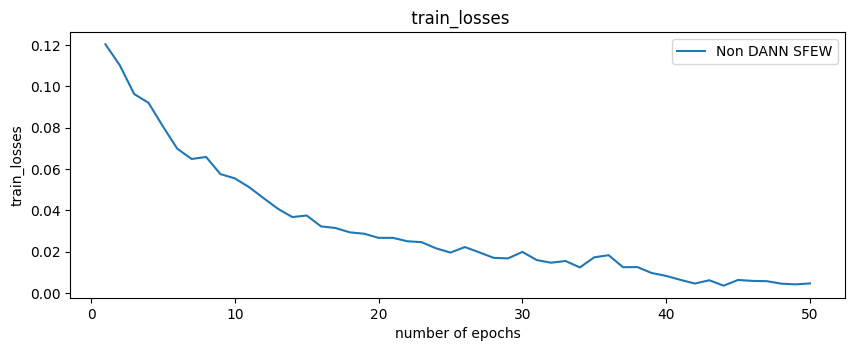

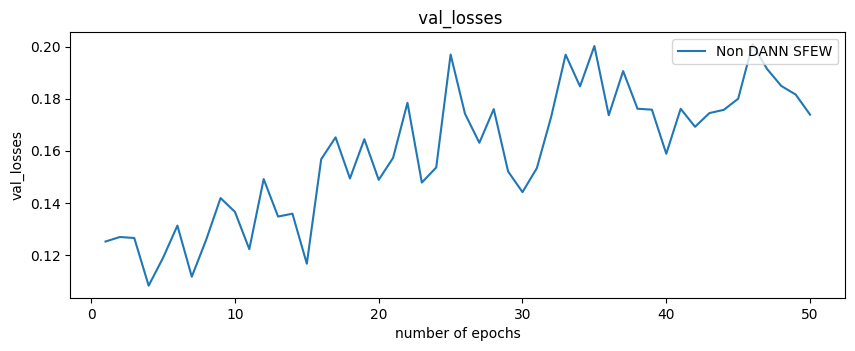

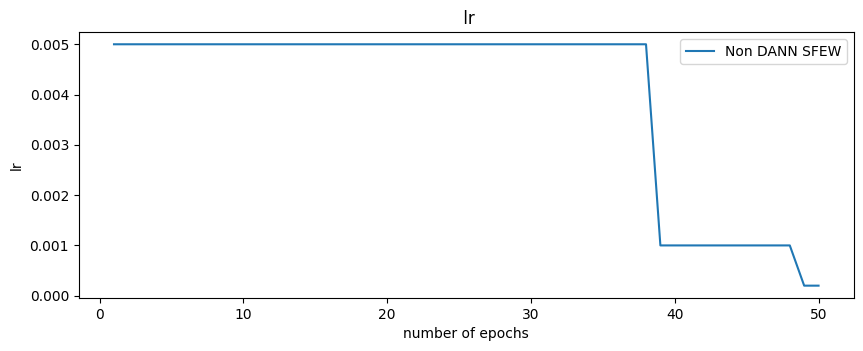

In [24]:
plot_loss_curves(dict_non_dann_losses,mode='train_losses')
plot_loss_curves(dict_non_dann_losses,mode='val_losses')
plot_loss_curves(dict_non_dann_losses,mode='lr')

### Saving NON DANN Model

In [25]:
MODEL_DIR = dataconfig.MODEL_DIR
NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
SPECIFIC_MODEL_DIR = Path(os.path.join(MODEL_DIR, f'non_dann_{source_name}_{target_name}'))
print(MODEL_DIR, NON_DANN_SFEW_DIR, SPECIFIC_MODEL_DIR)

/content/gdrive/MyDrive/CV_FER/models /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew_expw


In [26]:
model_name = f'non_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' #"non_dann_sfew_" +str(time.strftime("%d_%m"))+ ".pt"
# dataconfig = DataConfig()
# NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
if not SPECIFIC_MODEL_DIR.exists():
    # Create the directory
    SPECIFIC_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {SPECIFIC_MODEL_DIR} created successfully.')
else:
    print(f'Directory {SPECIFIC_MODEL_DIR} already exists.')

torch.save(non_dann_model.state_dict(), Path(SPECIFIC_MODEL_DIR,model_name))

Directory /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew_expw already exists.


In [27]:
# #@title Plotting Training and Validation Loss Function
# def plot_loss_curves(dict_non_dann_losses_list, mode = "train_losses"):
#     fig=plt.figure(figsize=(10,20))
#     fig.add_subplot(5, 1, 2)
#     # for embedding in dict_emb_file.keys():
#     list1_to_plot= dict_non_dann_losses_list[mode]
#     plt.plot(range(1,len(list1_to_plot)+1),list1_to_plot, label = 'Non DANN ' + 'SFEW')
#     plt.xlabel('number of epochs', fontsize=10)
#     plt.ylabel(str(mode), fontsize=10)
#     plt.legend(loc = 'upper right')
#     plt.title(" "+mode)
#     plt.show()

In [28]:
# plot_loss_curves(dict_non_dann_losses_list,mode='train_losses')
# plot_loss_curves(dict_non_dann_losses_list,mode='val_losses')
# plot_loss_curves(dict_non_dann_losses_list,mode='lr')

In [29]:
# model_name = model_name #"non_dann_sfew_19_12.pt"

## Loading NON DANN Model for DANN and DANN EWC


In [30]:
model_name = f'non_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' # Typical - non_dann_sfew_expw_30_01.pt This may change, use specific model name if required4
model_name

'non_dann_sfew_expw_04_02.pt'

In [31]:
# best_model_dann = DANN(num_classes=7, backbone = 'resnet18').to(device) # skeleton copy
# best_model_dann_ewc = DANN(num_classes=7, backbone = 'resnet18').to(device) # skeleton copy
# model_dann = deepcopy(non_dann_model) # saves training time - check with all
# model_dann_ewc = deepcopy(non_dann_model) # saves training time - check with all

In [32]:
# from data_config import DataConfig
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR

MODEL_PATH = Path(os.path.join(MODEL_DIR, f'non_dann_{source_name}_{target_name}', model_name))

loaded_model_non_dann = DANN(num_classes=7, backbone = 'resnet18') # skeleton copy
best_model_dann = DANN(num_classes=7, backbone = 'resnet18').to(device) # skeleton copy
best_model_dann_ewc = DANN(num_classes=7, backbone = 'resnet18').to(device) # skeleton copy

loaded_model_non_dann.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device(device)))

# loaded_model_non_dann.load_state_dict(torch.load(Path(NON_DANN_SFEW_DIR, model_name),map_location=torch.device(device)))
model_dann = deepcopy(loaded_model_non_dann) # saves training time - check with all
model_dann_ewc = deepcopy(loaded_model_non_dann) # saves training time - check with all


# print(model_dann)

feature extractor backbone created using resnet18 model
feature extractor backbone created using resnet18 model
feature extractor backbone created using resnet18 model


In [33]:
# #checking if the models are same weights, i.e. copy has worked fine
# for p1, p2 in zip(non_dann_model.parameters(), model_dann.parameters()):
#     if p1.data.ne(p2.data).sum() > 0:
#         print ('False')
# print ('True')

## DANN Execution :  Training, Validating, Saving


### DANN Execution Function

In [34]:

def execute_dann(model,
                 device,
                 source_train_loader, source_val_loader,
                 target_train_loader, target_val_loader,
                 optimizer,
                 n_epochs, # total number of epochs (different from individual epoch)
                 class_loss_function = nn.CrossEntropyLoss(),
                 domain_loss_function = nn.BCEWithLogitsLoss(),
                 scheduler = None,
                 early_stop_patience = None,
                 early_stop_difference = None
                 ):

    train_losses = [] # to capture train losses over training epochs
    val_losses = [] # to capture validation loss over epochs
    list_lr =[] # to capture lr over epochs
    epoch_converge = 0
    max_batches = min(len(source_train_loader), len(target_train_loader)) # Trying to check which is having less batches.
    model = model.to(device)

    # model.apply(weights_init) # TODO: skipping weights update - we can experimentation later on, and see if this helps
    list_alpha =[]


    # for best model
    best_model = deepcopy(model).to(device) # for best model
    best_val_loss = float('inf') # Initialize variables to track the best validation loss
    best_val_acc = 0 # Initialize variable to track best accuracy
    best_model_state = None # Initialize variables to track the best model state


    for epoch_idx in range(n_epochs):
        print(f'epoch = {epoch_idx+1}...in DANN execution function')
        source_iterator = iter(source_train_loader)
        target_iterator = iter (target_train_loader)
        epoch_task_loss = 0
        epoch_domain_loss =  0
        epoch_total_loss = 0
        processed = 0

        for batch_idx in range(max_batches-1):
            p = float(batch_idx + epoch_idx * max_batches) / (n_epochs * max_batches)
            alpha = 2. / (1. + np.exp(-10 * p)) - 1
            list_alpha.append(alpha)
            alpha = torch.tensor(alpha)

            model.train() # everytime ?
            optimizer.zero_grad() # flushing out the accumulated gradients

            #---------------------Source Dataset Training ------------------------#
            source_batch = next(source_iterator)
            source_images, source_labels = source_batch[0].to(device), source_batch[1].to(device) # getting images and labels, on device
            source_class_outputs, source_domain_outputs, _ = model(source_images, alpha=alpha) # forward pass, output = {class, domain, feature}


            loss_source_class = class_loss_function(source_class_outputs, source_labels) # calculating class loss

            source_domain_inputs = torch.tensor([1., 0.]*len(source_batch[0])).view(-1,2).to(device) # Source Image == [1., 0.]

            loss_source_domain = domain_loss_function(source_domain_outputs, source_domain_inputs) # calculating domain loss

            processed += len(source_batch[0])

            #---------------------Target Dataset Training ------------------------#
            target_batch = next (target_iterator)
            target_images = target_batch[0].to(device) # getting images, on device. There are no labels for target
            _, target_domain_outputs, _ = model(target_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            target_domain_inputs = torch.tensor([0., 1.]*len(source_batch[0])).view(-1,2).to(device)  # Target Image == [0., 1.]
            # print(f' target domain input shape {target_domain_inputs.shape}, output shape {target_domain_outputs.shape}')

            loss_target_domain = domain_loss_function(target_domain_outputs,target_domain_inputs)  # calculating domain loss


            #---------------------Combining Loss ------------------------#
            total_loss = loss_source_class + loss_source_domain + loss_target_domain
            total_loss.backward() #backpropogation, creating gradients
            optimizer.step() # updating the params

            epoch_task_loss += loss_source_class.item()
            epoch_domain_loss += loss_source_domain.item() + loss_target_domain.item()
            epoch_total_loss += total_loss.item()

            curr_lr = optimizer.param_groups[0]['lr'] # current learning rate
            list_lr.append(curr_lr)

            # after 10 batches
            if (batch_idx % 10 == 0):
                print("Epoch[{}/{}] Step[{}/{}]: loss_total={:.4f} / domain_loss_target={:.4f} / domain_loss_source={:.4f} / task_loss={:.4f} / domain_loss={:.4f} / alpha={:.2f} / lr={:.6f}"
              .format(epoch_idx + 1,
                      n_epochs,
                      batch_idx + 1,
                      max_batches,
                      total_loss.item(),
                      loss_target_domain.item()
                      ,loss_source_domain.item()
                      ,loss_source_class.item()
                      ,loss_source_domain.item()+loss_source_class.item(),
                      alpha,
                      curr_lr
                      ))
        # After every epoch
        avg_train_task_loss =  float("{:.6f}".format(epoch_task_loss/processed))
        train_losses.append(avg_train_task_loss)

        #Scheduler
        if scheduler:
          scheduler.step(avg_train_task_loss) ## applying scheduler on training loss

        #Validate Model after every epoch
        correct, avg_val_task_loss = test_model(model= model,
                                                device= device,
                                                data_loader = source_val_loader,
                                                class_loss_function = class_loss_function)
        val_losses.append(avg_val_task_loss)

        # # Check if the current model has the best validation loss
        # print(f'Last Epoch Val Loss = {avg_val_task_loss} | Best Val Loss = {best_val_loss}' )
        # if avg_val_task_loss < best_val_loss:
        #   best_val_loss = avg_val_task_loss
        #   # save the current model state as the best model state
        #   best_model_state = deepcopy(model.state_dict())
        #   print(f'Updated the best model with validation loss: {best_val_loss}\n')

        # check if the current model has the best accuracy
        print (f'last correct ={correct} | best correct = {best_val_acc}')
        if correct > best_val_acc:
          best_val_acc = correct
          # save the current model state as the best model state
          best_model_state = deepcopy(non_dann_model.state_dict())
          print(f'Updated the best model with correct: {correct}\n')



        #TODO: Early Stopping
        if early_stop_patience and early_stop_difference: # early stopping required
          if early_stopping_difference(val_losses,
                                       patience = early_stop_patience,
                                       difference= early_stop_difference):
            print (f'-------Early Stopping at epoch {epoch+1}---')
            epoch_converge = epoch+1
            break # break from epoch loop


    # Testing when the training is over - completed or early stopped
    ## using params of best model to update model
    if best_model_state: # only update if best model has been saved, else the last one would be picked up
      model.load_state_dict(best_model_state)
      print('Best model loaded')

    correct, test_loss_source = test_model(model= model,
                            device= device,
                            data_loader = source_val_loader, # source val loader
                            class_loss_function = class_loss_function)

    correct, test_loss_target = test_model(model= model,
                            device= device,
                            data_loader = target_val_loader, # target val loader
                            class_loss_function = class_loss_function)

    dict_dann_losses = {'train_losses' : train_losses,
                        'val_losses': val_losses,
                        'test_loss_source' : test_loss_source,
                        'test_loss_target' : test_loss_target,
                        'epoch_convergence' : epoch_converge,
                        'list_alpha' : list_alpha,
                        'lr':list_lr}

    print(f'alpha list \n {list_alpha}')
    return model, dict_dann_losses





In [35]:
lr_dann = runconfig.inital_lr
lr_dann = lr_dann / 5.0 # OVERRIDE
optimizer_dann = optim.SGD(model_dann.parameters(), lr = lr_dann, momentum = 0.9)
n_epochs = runconfig.EPOCHS

# ReduceLRonPlateau Scheduler Params
scheduler_patience = runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = runconfig.early_stop_patience
early_stop_difference = runconfig.early_stop_difference

# Set up the ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer_dann,
                              mode='min',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              min_lr=1e-6,
                              verbose= True)

print(f'------------training started for DANN Model ------------------')

dann_model_trained, dict_dann_losses = execute_dann(model=model_dann,
                                                    device=device,
                                                    source_train_loader = data_loader['source']['train'], #sfew_train_loader,
                                                    source_val_loader = data_loader['source']['val'], #sfew_val_loader,
                                                    target_train_loader = data_loader['target']['train'], #expw_train_loader,
                                                    target_val_loader = data_loader['target']['val'], #expw_val_loader,
                                                    optimizer = optimizer_dann,
                                                    n_epochs = n_epochs,
                                                    class_loss_function = runconfig.criterion_class,
                                                    domain_loss_function = runconfig.criterion_domain,
                                                    scheduler = scheduler,
                                                    early_stop_patience = early_stop_patience,
                                                    early_stop_difference = early_stop_difference
                                                    )

------------training started for DANN Model ------------------
epoch = 1...in DANN execution function
Epoch[1/50] Step[1/41]: loss_total=1.4407 / domain_loss_target=0.6875 / domain_loss_source=0.7381 / task_loss=0.0151 / domain_loss=0.7532 / alpha=0.00 / lr=0.001000
Epoch[1/50] Step[11/41]: loss_total=1.4901 / domain_loss_target=0.7064 / domain_loss_source=0.6856 / task_loss=0.0982 / domain_loss=0.7838 / alpha=0.02 / lr=0.001000
Epoch[1/50] Step[21/41]: loss_total=1.7739 / domain_loss_target=0.7292 / domain_loss_source=0.6497 / task_loss=0.3950 / domain_loss=1.0447 / alpha=0.05 / lr=0.001000
Epoch[1/50] Step[31/41]: loss_total=1.4082 / domain_loss_target=0.7408 / domain_loss_source=0.6138 / task_loss=0.0536 / domain_loss=0.6674 / alpha=0.07 / lr=0.001000
Test / Val: Average loss: 0.1614, Accuracy: 192/419 (45.82%)

last correct =192 | best correct = 0
Updated the best model with correct: 192

epoch = 2...in DANN execution function
Epoch[2/50] Step[1/41]: loss_total=1.3595 / domain_loss

In [36]:
# dict_dann_losses

### DANN Plotting and Validation

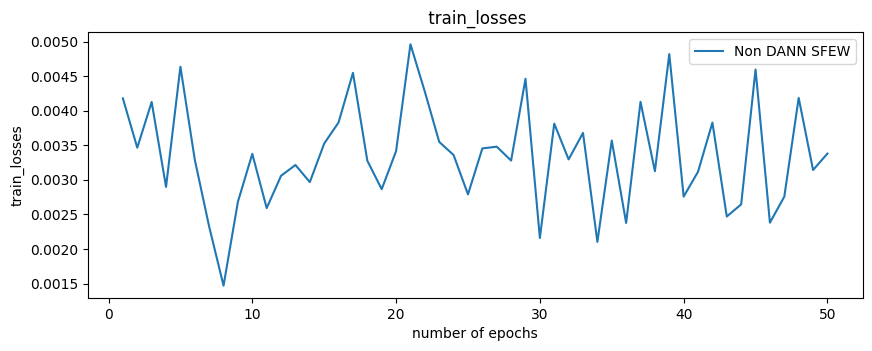

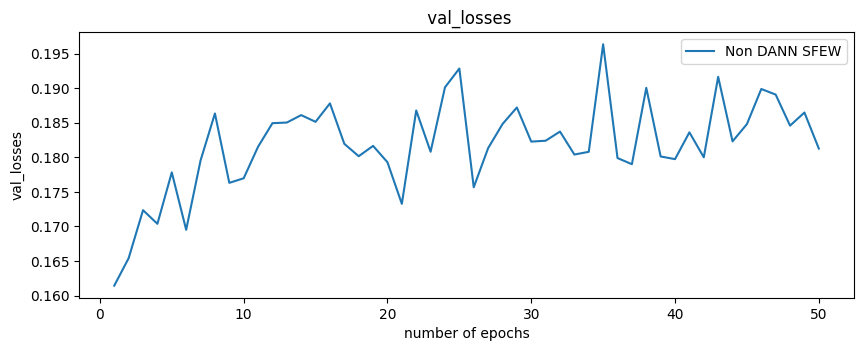

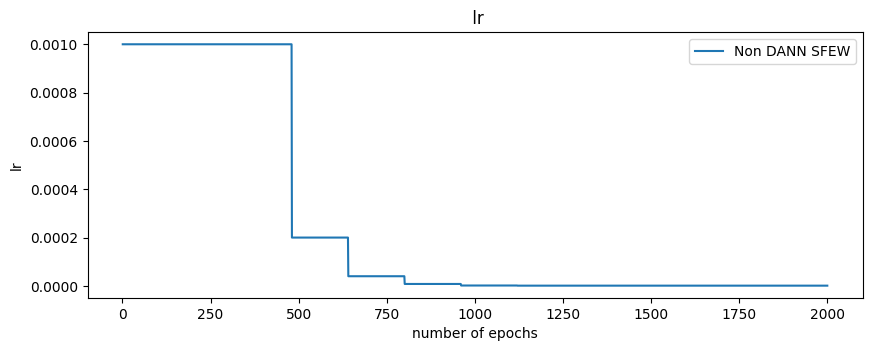

In [52]:
plot_loss_curves(dict_dann_losses,mode='train_losses')
plot_loss_curves(dict_dann_losses,mode='val_losses')
plot_loss_curves(dict_dann_losses,mode='lr')
# plot_loss_curves(dict_dann_losses,mode='list_alpha')


### Saving DANN Model

In [38]:
model_dann

DANN(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [39]:
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR
MODEL_DIR

PosixPath('/content/gdrive/MyDrive/CV_FER/models')

In [40]:

dann_model_name = f'dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' # "dann_sfew_expw_" + str(time.strftime("%d_%m")) + ".pt"
print(dann_model_name)

# from data_config import DataConfig
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR

DANN_MODEL_DIR =  Path(os.path.join(MODEL_DIR, f'dann_{source_name}_{target_name}'))
# try:
#     DANN_SFEW_EXPW_DIR = Path(dataconfig_1.DANN_SFEW_EXPW_DIR)
# except:
#     DANN_SFEW_EXPW_DIR =Path(dataconfig_1.MODEL_DIR,"dann_sfew_expw")


if not DANN_MODEL_DIR.exists():
    # Create the directory
    DANN_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {DANN_MODEL_DIR} created successfully.')
else:
    print(f'Directory {DANN_MODEL_DIR} already exists.')


try:
    torch.save(model_dann.state_dict(), Path(DANN_MODEL_DIR,dann_model_name))
    print(f'{dann_model_name} SAVED at {Path(DANN_MODEL_DIR,dann_model_name)}!')
except:
    print(f'Problem in saving {dann_model_name}, NOT SAVED!')


dann_sfew_expw_04_02.pt
Directory /content/gdrive/MyDrive/CV_FER/models/dann_sfew_expw already exists.
dann_sfew_expw_04_02.pt SAVED at /content/gdrive/MyDrive/CV_FER/models/dann_sfew_expw/dann_sfew_expw_04_02.pt!


## DANN EWC : Training, Validating, Saving

In [41]:
# dataconfig_inference = DataConfig()

# # NON DANN
# non_dann_model_sfew_name = 'non_dann_sfew_20_01.pt'
# non_dann_model_inference = DANN(num_classes=7) # skeleton copy
# NON_DANN_SFEW_DIR = dataconfig_inference.NON_DANN_SFEW_DIR # Path(self.MODEL_DIR,"non_dann_sfew")

# try:
#     non_dann_model.load_state_dict(torch.load(Path(NON_DANN_SFEW_DIR, non_dann_model_sfew_name),
#                                                         map_location=torch.device(device)))
#     print(f'{non_dann_model_sfew_name} locked and loaded')
# except:
#     print(f' problem in loading {non_dann_model_sfew_name}')


In [42]:
# model_dann_ewc = non_dann_model # saves training time - check with all


In [43]:
model_dann_ewc

DANN(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

### EWC Code
Regularization Penalty

In [44]:

from torch.autograd import Variable
from torch.autograd import Function
from da_cv_fer.run_config import RunConfig

runconfig = RunConfig()
def variable(t: torch.Tensor, use_cuda=True, **kwargs):
    if torch.cuda.is_available() and use_cuda:
        t = t.cuda()
    return Variable(t, **kwargs)

class EWC(object):
    def __init__(self, model: nn.Module,
                 data_loader: torch.utils.data.DataLoader
                #  dataset: list
                 ,device=device
                 , class_loss_function = runconfig.criterion_class):

        self.model = model
        # print("----------MODEL--------\n",self.model)
        self.dataset = data_loader
        self.device = device
        self.class_loss_function = class_loss_function

        # creating dictionary of params which required grad
        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}

        self._means = {}
        for n, p in deepcopy(self.params).items():
            self._means[n] = variable(p.data)

        # print("--------self._means----------------\n", self._means)

        self._precision_matrices = self._diag_fisher()

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = variable(p.data)
        # print("--------PRECISION MATRICES----------------\n", precision_matrices)

        self.model.eval()
        for batch in self.dataset:
            self.model.zero_grad()
            images, labels  = variable(batch[0].to(device)), variable(batch[1].to(device))
            class_ouputs, _ , _ = model(images) # class_output, domain_output, features
            task_loss =  self.class_loss_function(class_ouputs,labels)
            task_loss.backward() # only calculating the gradients, not updating it
            # print("--------task loss----------------\n", task_loss)

            for n, p in self.model.named_parameters():
              # if type(p.grad)
              if isinstance(p.grad, type(None)):
                pass # parameter value would remain as it is
              else:
                # print(n,":", type(p.grad))
                precision_matrices[n].data += p.grad.data ** 2 / len(self.dataset)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model: nn.Module):
        loss = 0
        for n, p in model.named_parameters():
            _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
            loss += _loss.sum()
        return loss

**DANN EWC Object.**

In [45]:
# ewc_object = EWC(deepcopy(model_dann_ewc),
#                  data_loader=data_loader['source']['train'],#sfew_train_loader,
#                  device=device,
#                  class_loss_function=runconfig.criterion_class)

### DANN EWC Execution (training and testing) Function without Learning rate
Training Function

In [46]:
def execute_dann_ewc(model,
                     device,
                     source_train_loader, source_val_loader,
                     target_train_loader, target_val_loader,
                     optimizer,
                     n_epochs, # total number of epochs (different from individual epoch)
                     class_loss_function = nn.CrossEntropyLoss(),
                     domain_loss_function = nn.BCEWithLogitsLoss(),
                     EWC_LAMBDA = 0.4, # to understand regularlization
                     scheduler = None,
                     early_stop_patience = None,
                     early_stop_difference = None
                     ):

    train_losses = [] # to capture train losses over training epochs
    val_losses = [] # to capture validation loss over epochs
    list_lr = [] # to capture lr changes across epochs
    epoch_converge = 0
    max_batches = min(len(source_train_loader), len(target_train_loader)) # Trying to check which is having less batches.
    existing_model = deepcopy(model)
    model = deepcopy(model).to(device) # copies params from existing model to another one https://discuss.pytorch.org/t/copying-weights-from-one-net-to-another/1492/2
    # model.apply(weights_init) # TODO: skipping weights update - we can experimentation later on, and see if this helps
    list_alpha =[]
    #TODO: Scheduler
    # scheduler = ReduceLROnPlateau(optimizer, factor = 0.1, patience = 5, threshold =  0.0005, verbose = True)

    ewc_object = EWC(deepcopy(model),
                     data_loader=source_train_loader,
                     device=device,
                     class_loss_function=class_loss_function) # instantiating EWC object, we would use this object for understanding penalty


    # for best model
    best_model = deepcopy(model).to(device) # for best model
    best_val_loss = float('inf') # Initialize variables to track the best validation loss
    best_model_state = None # Initialize variables to track the best model state
    best_val_acc = 0 # Initialize variables to track the best accuracy


    for epoch_idx in range(n_epochs):
        print(f'epoch = {epoch_idx+1}...in EWC DANN execution function')
        source_iterator = iter(source_train_loader)
        target_iterator = iter(target_train_loader)
        epoch_task_loss = 0
        epoch_domain_loss =  0
        epoch_total_loss = 0
        processed = 0

        for batch_idx in range(max_batches-1):
            p = float(batch_idx + epoch_idx * max_batches) / (n_epochs * max_batches)
            alpha = 2. / (1. + np.exp(-10 * p)) - 1
            list_alpha.append(alpha)
            alpha = torch.tensor(alpha)

            model.train() # everytime ?
            optimizer.zero_grad() # flushing out the accumulated gradients

            #---------------------Source Dataset Training ------------------------#
            source_batch = next(source_iterator)
            source_images, source_labels = source_batch[0].to(device), source_batch[1].to(device) # getting images and labels, on device
            source_class_outputs, source_domain_outputs, _ = model(source_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            # Calculating source class loss, regularlized by EWC
            loss_source_class = class_loss_function(source_class_outputs, source_labels) + EWC_LAMBDA * ewc_object.penalty(model)# calculating class loss

            source_domain_inputs = torch.tensor([1., 0.]*len(source_batch[0])).view(-1,2).to(device) # Source Image == [1., 0.]

            loss_source_domain = domain_loss_function(source_domain_outputs, source_domain_inputs) # calculating domain loss

            processed += len(source_batch[0])

            #---------------------Target Dataset Training ------------------------#
            target_batch = next (target_iterator)
            target_images = target_batch[0].to(device) # getting images, on device. There are no labels for target
            _, target_domain_outputs, _ = model(target_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            target_domain_inputs = torch.tensor([0., 1.]*len(source_batch[0])).view(-1,2).to(device) # Target Image == [0., 1.]

            loss_target_domain = domain_loss_function(target_domain_outputs,target_domain_inputs)  # calculating domain loss


            #---------------------Combining Loss ------------------------#
            total_loss = loss_source_class + loss_source_domain + loss_target_domain
            total_loss.backward() #backpropogation, creating gradients
            optimizer.step() # updating the params

            epoch_task_loss += loss_source_class.item()
            epoch_domain_loss += loss_source_domain.item() + loss_target_domain.item()
            epoch_total_loss += total_loss.item()

            curr_lr = optimizer.param_groups[0]['lr'] # current learning rate
            list_lr.append(curr_lr)


            # after 10 batches
            if (batch_idx % 50 == 0):
                print("Epoch [{}/{}] Step [{}/{}]: loss_total={:.4f} / domain_loss_target={:.4f} / domain_loss_source={:.4f} / task_loss={:.4f} / domain_loss={:.4f} / alpha={:.4f} / lr={:.6f}"
              .format(epoch_idx + 1,
                      n_epochs,
                      batch_idx + 1,
                      max_batches,
                      total_loss.item(),
                      loss_target_domain.item()
                      ,loss_source_domain.item()
                      ,loss_source_class.item()
                      ,loss_source_domain.item()+loss_source_class.item(),
                      alpha,
                      curr_lr
                      ))
        # After every epoch
        avg_train_task_loss =  float("{:.6f}".format(epoch_task_loss/processed))
        train_losses.append(avg_train_task_loss)

        #Scheduler
        if scheduler:
          scheduler.step(avg_train_task_loss) ## applying scheduler on training loss

        #Validate Model after every epoch
        correct, avg_val_task_loss = test_model(model= model,
                                                device= device,
                                                data_loader = source_val_loader,
                                                class_loss_function = class_loss_function)
        val_losses.append(avg_val_task_loss)

        # # Check if the current model has the best validation loss
        # print(f'Last Epoch Val Loss = {avg_val_task_loss} | Best Val Loss = {best_val_loss}' )
        # if avg_val_task_loss < best_val_loss:
        #   best_val_loss = avg_val_task_loss
        #   # save the current model state as the best model state
        #   best_model_state = deepcopy(model.state_dict())
        #   print(f'Updated the best model with validation loss: {best_val_loss}\n')

        # check if the current model has the best accuracy
        print (f'last correct ={correct} | best correct = {best_val_acc}')
        if correct > best_val_acc:
          best_val_acc = correct
          # save the current model state as the best model state
          best_model_state = deepcopy(non_dann_model.state_dict())
          print(f'Updated the best model with correct: {correct}\n')

        #TODO: Early Stopping
        if early_stop_patience and early_stop_difference: # early stopping required
          if early_stopping_difference(val_losses,
                                       patience = early_stop_patience,
                                       difference= early_stop_difference):
            print (f'-------Early Stopping at epoch {epoch+1}---')
            epoch_converge = epoch+1
            break # break from epoch loop

    # Testing when the training is over - completed or early stopped

    ## using params of best model to update model
    if best_model_state: # only update if best model has been saved, else the last one would be picked up
      model.load_state_dict(best_model_state)
      print('Best model loaded')

    correct_source, test_loss_source = test_model(model= model,
                            device= device,
                            data_loader = source_val_loader, # source val loader
                            class_loss_function = class_loss_function)

    accuracy_source = correct_source / len(source_val_loader.dataset)

    correct_target, test_loss_target = test_model(model= model,
                            device= device,
                            data_loader = target_val_loader, # target val loader
                            class_loss_function = class_loss_function)

    accuracy_target = correct_target / len(target_val_loader.dataset)


    dict_ewc_dann_losses = {'train_losses' : train_losses,
                        'val_losses': val_losses,
                        'test_loss_source' : test_loss_source,
                        'test_loss_target' : test_loss_target,
                        'epoch_convergence' : epoch_converge,
                        'list_alpha' : list_alpha,
                        'test_accuracy_source' : accuracy_source,
                        'test_accuracy_target':accuracy_target,
                            'lr':list_lr}

    print(f'alpha list \n {list_alpha}')
    return model, dict_ewc_dann_losses





### DANN EWC Execute

In [47]:
runconfig = RunConfig()
lr_ewc_dann = runconfig.inital_lr/5.0 #override
optimizer_ewc_dann = optim.SGD(model_dann.parameters(), lr = lr_ewc_dann, momentum = 0.9)
n_epochs = runconfig.EPOCHS
# n_epochs = 5 # override

# ReduceLRonPlateau Scheduler Params
scheduler_patience = runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = runconfig.early_stop_patience
early_stop_difference = runconfig.early_stop_difference

# Set up the ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer_ewc_dann,
                              mode='min',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              min_lr=1e-6,
                              verbose= True)

try:
    EWC_LAMBDA = runconfig.EWC_LAMBDA
except:
    EWC_LAMBDA = 0.4

print(EWC_LAMBDA)

print(f'------------training started for EWC DANN Model ------------------')

ewc_dann_model , dict_ewc_dann_losses = execute_dann_ewc(model=model_dann,
                                                          device=device,
                                                          source_train_loader = data_loader['source']['train'], #sfew_train_loader,
                                                          source_val_loader = data_loader['source']['val'], #sfew_val_loader,
                                                          target_train_loader = data_loader['target']['train'], #expw_train_loader,
                                                          target_val_loader = data_loader['target']['val'], #expw_val_loader,
                                                          optimizer = optimizer_ewc_dann,
                                                          n_epochs = n_epochs,
                                                          class_loss_function = runconfig.criterion_class,
                                                          domain_loss_function = runconfig.criterion_domain,
                                                          EWC_LAMBDA=EWC_LAMBDA, # Hyperparameter about penalty relevance
                                                          scheduler = None,
                                                          early_stop_patience = None,
                                                          early_stop_difference = None)

0.4
------------training started for EWC DANN Model ------------------
epoch = 1...in EWC DANN execution function
Epoch [1/50] Step [1/41]: loss_total=1.4475 / domain_loss_target=0.6911 / domain_loss_source=0.7430 / task_loss=0.0134 / domain_loss=0.7564 / alpha=0.0000 / lr=0.001000
Test / Val: Average loss: 0.1674, Accuracy: 192/419 (45.82%)

last correct =192 | best correct = 0
Updated the best model with correct: 192

epoch = 2...in EWC DANN execution function
Epoch [2/50] Step [1/41]: loss_total=1.6561 / domain_loss_target=0.6904 / domain_loss_source=0.7193 / task_loss=0.2464 / domain_loss=0.9657 / alpha=0.0997 / lr=0.001000
Test / Val: Average loss: 0.1643, Accuracy: 190/419 (45.35%)

last correct =190 | best correct = 192
epoch = 3...in EWC DANN execution function
Epoch [3/50] Step [1/41]: loss_total=1.4208 / domain_loss_target=0.6805 / domain_loss_source=0.7101 / task_loss=0.0302 / domain_loss=0.7403 / alpha=0.1974 / lr=0.001000
Test / Val: Average loss: 0.1589, Accuracy: 191/419

### DANN EWC Plotting and Validation

In [48]:
dict_ewc_dann_losses['test_loss_source'], dict_ewc_dann_losses['test_loss_target']

(0.16160213008416296, 0.6136141244102927)

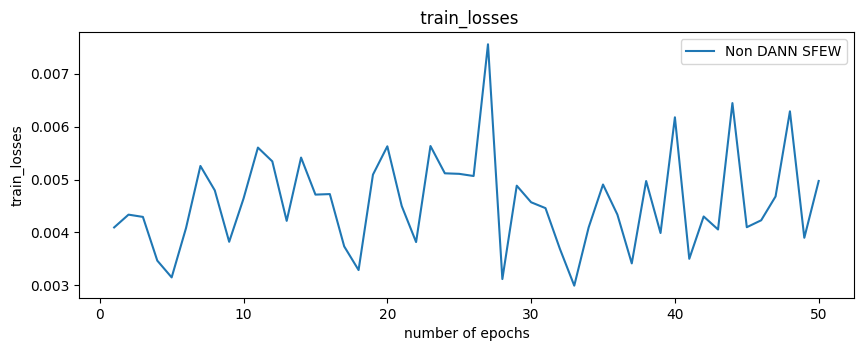

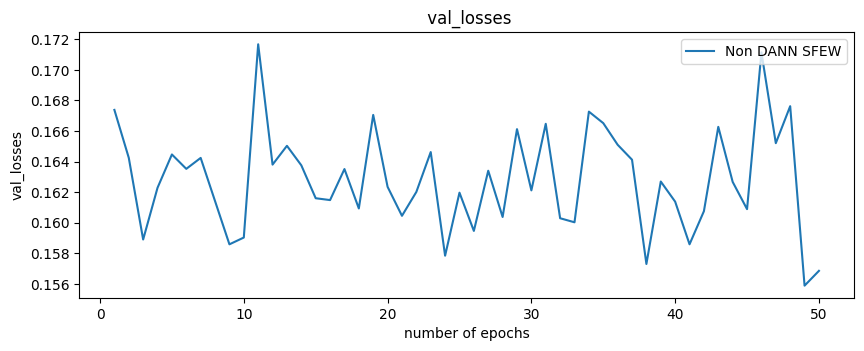

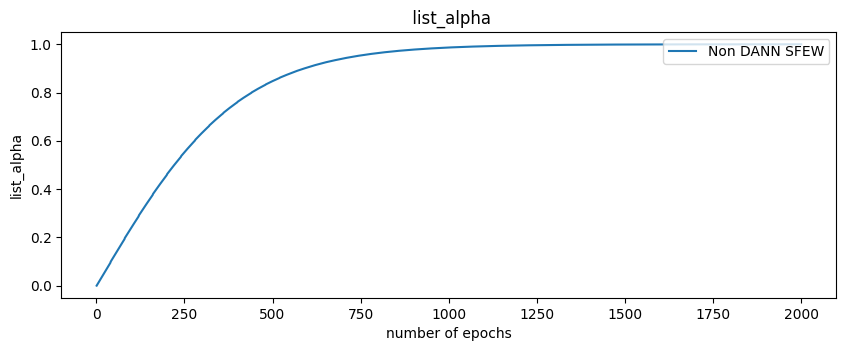

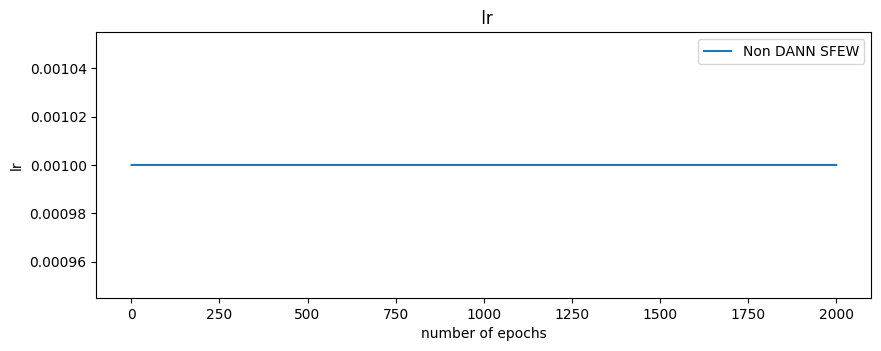

In [49]:
plot_loss_curves(dict_ewc_dann_losses,mode='train_losses')
plot_loss_curves(dict_ewc_dann_losses,mode='val_losses')
plot_loss_curves(dict_ewc_dann_losses,mode='list_alpha')
plot_loss_curves(dict_ewc_dann_losses,mode='lr')

### Saving DANN EWC Model

In [50]:
# ewc_dann_model_name = 'ewc_dann_sfew_expw_30_01.pt'
ewc_dann_model_name = f'ewc_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' #"ewc_dann_sfew_expw_" + str(time.strftime("%d_%m")) + ".pt"
print(ewc_dann_model_name)

from da_cv_fer.data_config import DataConfig
dataconfig_2 = DataConfig()
MODEL_DIR = dataconfig_2.MODEL_DIR


EWC_DANN_MODEL_DIR =  Path(os.path.join(MODEL_DIR, f'ewc_dann_{source_name}_{target_name}'))
# try:
#     EWC_DANN_SFEW_EXPW_DIR = Path(dataconfig_2.EWC_DANN_SFEW_EXPW_DIR)
# except:
#     EWC_DANN_SFEW_EXPW_DIR =Path(dataconfig_2.MODEL_DIR,"ewc_dann_sfew_expw")


if not EWC_DANN_MODEL_DIR.exists():
    # Create the directory
    EWC_DANN_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {EWC_DANN_MODEL_DIR} created successfully.')
else:
    print(f'Directory {EWC_DANN_MODEL_DIR} already exists.')

try:
    torch.save(ewc_dann_model.state_dict(), Path(EWC_DANN_MODEL_DIR,ewc_dann_model_name))
    print(f'{ewc_dann_model_name} SAVED at {Path(EWC_DANN_MODEL_DIR,ewc_dann_model_name)}!')
except:
    print(f'Problem in saving {ewc_dann_model_name}, NOT SAVED!')


ewc_dann_sfew_expw_04_02.pt
Directory /content/gdrive/MyDrive/CV_FER/models/ewc_dann_sfew_expw already exists.
ewc_dann_sfew_expw_04_02.pt SAVED at /content/gdrive/MyDrive/CV_FER/models/ewc_dann_sfew_expw/ewc_dann_sfew_expw_04_02.pt!
